In [117]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [118]:
# 2. find url and store it in a variable
url = "https://www.popvortex.com/music/charts/top-100-songs.php"

In [119]:
response = requests.get(url)

In [120]:
response.status_code

200

In [121]:
# response.content

### 1. TOP 100 songs

In [122]:
soup = BeautifulSoup(response.content, "html.parser")

In [123]:
soup.select('div.chart-content.col-xs-12.col-sm-8 > p > cite')

[<cite class="title">TEXAS HOLD 'EM</cite>,
 <cite class="title">Beautiful Things</cite>,
 <cite class="title">Lose Control</cite>,
 <cite class="title">Run Back To You</cite>,
 <cite class="title">Wine Into Whiskey</cite>,
 <cite class="title">The Machine</cite>,
 <cite class="title">TEXAS HOLD 'EM</cite>,
 <cite class="title">Lovin On Me</cite>,
 <cite class="title">Flowers</cite>,
 <cite class="title">Drown</cite>,
 <cite class="title">Don't Let the Old Man In</cite>,
 <cite class="title">Made For Me</cite>,
 <cite class="title">Beautiful Things (Acoustic)</cite>,
 <cite class="title">Fast Car</cite>,
 <cite class="title">Beautiful Things (Slowed Down)</cite>,
 <cite class="title">Beautiful Things (Sped Up)</cite>,
 <cite class="title">Selfish</cite>,
 <cite class="title">Love On</cite>,
 <cite class="title">Made In China</cite>,
 <cite class="title">Where the Wild Things Are</cite>,
 <cite class="title">Holy Smokes</cite>,
 <cite class="title">FAKE LOVE</cite>,
 <cite class="title"

In [124]:
len(soup.select('div.chart-content.col-xs-12.col-sm-8 > p > cite'))

100

In [125]:
soup.select('div.chart-content.col-xs-12.col-sm-8 > p > em')

[<em class="artist">Beyoncé</em>,
 <em class="artist">Benson Boone</em>,
 <em class="artist">Teddy Swims</em>,
 <em class="artist">LAY &amp; Lauv</em>,
 <em class="artist">Tucker Wetmore</em>,
 <em class="artist">Tom MacDonald</em>,
 <em class="artist">Beyoncé</em>,
 <em class="artist">Jack Harlow</em>,
 <em class="artist">Miley Cyrus</em>,
 <em class="artist">Justin Timberlake</em>,
 <em class="artist">Toby Keith</em>,
 <em class="artist">Muni Long</em>,
 <em class="artist">Benson Boone</em>,
 <em class="artist">Luke Combs</em>,
 <em class="artist">Benson Boone</em>,
 <em class="artist">Benson Boone</em>,
 <em class="artist">Justin Timberlake</em>,
 <em class="artist">Selena Gomez</em>,
 <em class="artist">Aaron Lewis</em>,
 <em class="artist">Luke Combs</em>,
 <em class="artist">Bailey Zimmerman</em>,
 <em class="artist">BTS</em>,
 <em class="artist">Dua Lipa</em>,
 <em class="artist">Tim McGraw</em>,
 <em class="artist">Zach Bryan</em>,
 <em class="artist">LINKIN PARK</em>,
 <em cla

In [126]:
len(soup.select('div.chart-content.col-xs-12.col-sm-8 > p > em'))

100

In [127]:
songs = []
artists = []
for i in range(1,99):
    songs.append(soup.select('div.chart-content.col-xs-12.col-sm-8 > p > cite')[i].get_text())
    artists.append(soup.select('div.chart-content.col-xs-12.col-sm-8 > p > em')[i].get_text())

In [128]:
top100 = pd.DataFrame({'song':songs, 'artist':artists})

In [129]:
top100.head(10)

,song,artist
0,Beautiful Things,Benson Boone
1,Lose Control,Teddy Swims
2,Run Back To You,LAY & Lauv
3,Wine Into Whiskey,Tucker Wetmore
4,The Machine,Tom MacDonald
5,TEXAS HOLD 'EM,Beyoncé
6,Lovin On Me,Jack Harlow
7,Flowers,Miley Cyrus
8,Drown,Justin Timberlake
9,Don't Let the Old Man In,Toby Keith


### 2. RECOMENDER

In [130]:
wish = input("What song do you want?")

What song do you want?Tobogan


In [132]:
from random import randint  
def print_a_song(song_index):
    print(top100['song'][song_index],',', 'by', top100['artist'][song_index])

index = -1

try:
    index = (top100[top100['song'] == wish].index.values)[0]
except:
    print("The song is not in the list.")

if index >= 0:
    print_a_song(index)
else:
    random_song = randint(1, 100)
    print("Try this one:")
    print_a_song(random_song)

The song is not in the list.
Try this one:
16 CARRIAGES , by Beyoncé


### 3. Create your collection of songs & audio features

In [133]:
!pip install spotipy

In [171]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [263]:
secrets_file = open("secrets.txt","r")

In [264]:
string = secrets_file.read()

In [265]:
secrets_dict={}
for line in string.split('\n'):
    if len(line) > 0:
        #print(line.split(':'))
        secrets_dict[line.split(':')[0]]=line.split(':')[1].strip()

In [266]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['clientid'],
                                                           client_secret=secrets_dict['clientsecret']))

In [269]:
playlist = sp.user_playlist_tracks("spotify", "2of0Tvx7RbES2fjdlEAeDt")

In [270]:
playlist

{'href': 'https://api.spotify.com/v1/playlists/2of0Tvx7RbES2fjdlEAeDt/tracks?offset=0&limit=100&additional_types=track',
 'items': [{'added_at': '2017-12-24T00:50:11Z',
   'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/7ro2rs9f58ar1eryqo5uvw6wm'},
    'href': 'https://api.spotify.com/v1/users/7ro2rs9f58ar1eryqo5uvw6wm',
    'id': '7ro2rs9f58ar1eryqo5uvw6wm',
    'type': 'user',
    'uri': 'spotify:user:7ro2rs9f58ar1eryqo5uvw6wm'},
   'is_local': False,
   'primary_color': None,
   'track': {'album': {'album_type': 'album',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4UXqAaa6dQYAk18Lv7PEgX'},
       'href': 'https://api.spotify.com/v1/artists/4UXqAaa6dQYAk18Lv7PEgX',
       'id': '4UXqAaa6dQYAk18Lv7PEgX',
       'name': 'Fall Out Boy',
       'type': 'artist',
       'uri': 'spotify:artist:4UXqAaa6dQYAk18Lv7PEgX'}],
     'available_markets': [],
     'external_urls': {'spotify': 'https://open.spotify.com/album/0dAvbhVYW3bGnLl

In [271]:
playlist.keys() 

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [272]:
playlist["items"][0].keys()

dict_keys(['added_at', 'added_by', 'is_local', 'primary_color', 'track', 'video_thumbnail'])

In [273]:
playlist["items"][0]["track"]

{'album': {'album_type': 'album',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4UXqAaa6dQYAk18Lv7PEgX'},
    'href': 'https://api.spotify.com/v1/artists/4UXqAaa6dQYAk18Lv7PEgX',
    'id': '4UXqAaa6dQYAk18Lv7PEgX',
    'name': 'Fall Out Boy',
    'type': 'artist',
    'uri': 'spotify:artist:4UXqAaa6dQYAk18Lv7PEgX'}],
  'available_markets': [],
  'external_urls': {'spotify': 'https://open.spotify.com/album/0dAvbhVYW3bGnLldQ8Nvwn'},
  'href': 'https://api.spotify.com/v1/albums/0dAvbhVYW3bGnLldQ8Nvwn',
  'id': '0dAvbhVYW3bGnLldQ8Nvwn',
  'images': [{'height': 640,
    'url': 'https://i.scdn.co/image/ab67616d0000b2739e74f9f0a2e01094e3b5f1d8',
    'width': 640},
   {'height': 300,
    'url': 'https://i.scdn.co/image/ab67616d00001e029e74f9f0a2e01094e3b5f1d8',
    'width': 300},
   {'height': 64,
    'url': 'https://i.scdn.co/image/ab67616d000048519e74f9f0a2e01094e3b5f1d8',
    'width': 64}],
  'name': 'American Beauty/American Psycho',
  'release_date': '2015-0

In [274]:
playlist["items"][0]['track']['artists'][0]['name']

'Fall Out Boy'

In [275]:
playlist["items"][0]["track"]["name"]

'Centuries'

In [276]:
playlist["total"]

9984

In [277]:
playlist["next"]

'https://api.spotify.com/v1/playlists/2of0Tvx7RbES2fjdlEAeDt/tracks?offset=100&limit=100&additional_types=track'

In [278]:
from random import randint
from time import sleep

def get_playlist_tracks(playlist_id):
    results = sp.user_playlist_tracks("spotify",playlist_id)
    tracks = results['items']
    while results['next']!=None:
        results = sp.next(results)
        tracks = tracks + results['items']
        sleep(randint(1,3000)/1000) # respectful nap
    return tracks

In [279]:
all_tracks = get_playlist_tracks("2of0Tvx7RbES2fjdlEAeDt")
len(all_tracks)

9984

In [280]:
import pandas as pd
from pandas import json_normalize
pd.set_option("display.max_columns", 0)

In [281]:
tracks = json_normalize(all_tracks)

In [282]:
tracks.columns

Index(['added_at', 'is_local', 'primary_color',
       'added_by.external_urls.spotify', 'added_by.href', 'added_by.id',
       'added_by.type', 'added_by.uri', 'track.album.album_type',
       'track.album.artists', 'track.album.available_markets',
       'track.album.external_urls.spotify', 'track.album.href',
       'track.album.id', 'track.album.images', 'track.album.name',
       'track.album.release_date', 'track.album.release_date_precision',
       'track.album.total_tracks', 'track.album.type', 'track.album.uri',
       'track.artists', 'track.available_markets', 'track.disc_number',
       'track.duration_ms', 'track.episode', 'track.explicit',
       'track.external_ids.isrc', 'track.external_urls.spotify', 'track.href',
       'track.id', 'track.is_local', 'track.name', 'track.popularity',
       'track.preview_url', 'track.track', 'track.track_number', 'track.type',
       'track.uri', 'video_thumbnail.url'],
      dtype='object')

In [285]:
artists_df1 = pd.DataFrame(columns=['track.name', 'track.id', 'track.popularity'])
for i in tracks.index:
    artists_for_song = json_normalize(tracks.iloc[i]['track.artists'])
    artists_for_song['song_id']    = tracks.iloc[i]['track.id']         
    artists_for_song['song_name']  = tracks.iloc[i]['track.name']       
    artists_for_song['popularity'] = tracks.iloc[i]['track.popularity']

    artists_df1 = pd.concat([artists_df1, artists_for_song], axis=0)

In [286]:
artists_df1.to_csv('artists_df1.csv', index=False)

In [287]:
data = pd.read_csv('artists_df1.csv')

In [288]:
data.isna().sum()

track.name               14124
track.id                 14124
track.popularity         14124
href                         1
id                           1
name                         1
type                         0
uri                          1
external_urls.spotify        1
song_id                      1
song_name                    1
popularity                   0
dtype: int64

In [289]:
data.dropna(subset=['song_id'], inplace=True)

In [290]:
data.drop(['track.name', 'track.id', 'track.popularity'], axis=1, inplace=True)

In [291]:
data.head(10)

,href,id,name,type,uri,external_urls.spotify,song_id,song_name,popularity
0,https://api.spotify.com/v1/artists/4UXqAaa6dQY...,4UXqAaa6dQYAk18Lv7PEgX,Fall Out Boy,artist,spotify:artist:4UXqAaa6dQYAk18Lv7PEgX,https://open.spotify.com/artist/4UXqAaa6dQYAk1...,0yhPEz5KxlDwckGJaMlZqM,Centuries,0.0
1,https://api.spotify.com/v1/artists/4UXqAaa6dQY...,4UXqAaa6dQYAk18Lv7PEgX,Fall Out Boy,artist,spotify:artist:4UXqAaa6dQYAk18Lv7PEgX,https://open.spotify.com/artist/4UXqAaa6dQYAk1...,6OZPl7bOm8EOshsVmWH5W8,Immortals,0.0
2,https://api.spotify.com/v1/artists/6XyY86QOPPr...,6XyY86QOPPrYVGvF9ch6wz,Linkin Park,artist,spotify:artist:6XyY86QOPPrYVGvF9ch6wz,https://open.spotify.com/artist/6XyY86QOPPrYVG...,0UFDKFqW2oGspYeYqo9wjA,Bleed It Out,82.0
3,https://api.spotify.com/v1/artists/4UXqAaa6dQY...,4UXqAaa6dQYAk18Lv7PEgX,Fall Out Boy,artist,spotify:artist:4UXqAaa6dQYAk18Lv7PEgX,https://open.spotify.com/artist/4UXqAaa6dQYAk1...,3IEHJ5lWMxExmrn2zlhcVu,Champion,0.0
4,https://api.spotify.com/v1/artists/4UXqAaa6dQY...,4UXqAaa6dQYAk18Lv7PEgX,Fall Out Boy,artist,spotify:artist:4UXqAaa6dQYAk18Lv7PEgX,https://open.spotify.com/artist/4UXqAaa6dQYAk1...,4zjFqN9fXAw91GNgJOCYX6,"Sugar, We're Goin Down",0.0
5,https://api.spotify.com/v1/artists/4UXqAaa6dQY...,4UXqAaa6dQYAk18Lv7PEgX,Fall Out Boy,artist,spotify:artist:4UXqAaa6dQYAk18Lv7PEgX,https://open.spotify.com/artist/4UXqAaa6dQYAk1...,4QIAVbGpeb5RdAGW66kY2h,"Dance, Dance",0.0
6,https://api.spotify.com/v1/artists/4UXqAaa6dQY...,4UXqAaa6dQYAk18Lv7PEgX,Fall Out Boy,artist,spotify:artist:4UXqAaa6dQYAk18Lv7PEgX,https://open.spotify.com/artist/4UXqAaa6dQYAk1...,34Jeq8ktRzyOW1uw40InVy,Uma Thurman,0.0
7,https://api.spotify.com/v1/artists/4UXqAaa6dQY...,4UXqAaa6dQYAk18Lv7PEgX,Fall Out Boy,artist,spotify:artist:4UXqAaa6dQYAk18Lv7PEgX,https://open.spotify.com/artist/4UXqAaa6dQYAk1...,4urmOSZcGQVcGz3rpMzy3y,Irresistible,0.0
8,https://api.spotify.com/v1/artists/4UXqAaa6dQY...,4UXqAaa6dQYAk18Lv7PEgX,Fall Out Boy,artist,spotify:artist:4UXqAaa6dQYAk18Lv7PEgX,https://open.spotify.com/artist/4UXqAaa6dQYAk1...,3RSppwOOTuyZha9Fzy6J1M,Young And Menace,0.0
9,https://api.spotify.com/v1/artists/4UXqAaa6dQY...,4UXqAaa6dQYAk18Lv7PEgX,Fall Out Boy,artist,spotify:artist:4UXqAaa6dQYAk18Lv7PEgX,https://open.spotify.com/artist/4UXqAaa6dQYAk1...,2zmk3eaesHxXcC2eEbDckZ,The Kids Aren't Alright,0.0


In [292]:
len(data)

14123

In [293]:
data = data.drop(['href','type','uri','external_urls.spotify'], axis=1)


In [294]:
data

,id,name,song_id,song_name,popularity
0,4UXqAaa6dQYAk18Lv7PEgX,Fall Out Boy,0yhPEz5KxlDwckGJaMlZqM,Centuries,0.0
1,4UXqAaa6dQYAk18Lv7PEgX,Fall Out Boy,6OZPl7bOm8EOshsVmWH5W8,Immortals,0.0
2,6XyY86QOPPrYVGvF9ch6wz,Linkin Park,0UFDKFqW2oGspYeYqo9wjA,Bleed It Out,82.0
3,4UXqAaa6dQYAk18Lv7PEgX,Fall Out Boy,3IEHJ5lWMxExmrn2zlhcVu,Champion,0.0
4,4UXqAaa6dQYAk18Lv7PEgX,Fall Out Boy,4zjFqN9fXAw91GNgJOCYX6,"Sugar, We're Goin Down",0.0
...,...,...,...,...,...
14119,4UXqAaa6dQYAk18Lv7PEgX,Fall Out Boy,60glT2wsoSHV3B8yCRSB8v,We Didn’t Start The Fire,70.0
14120,6IkfE2JyVoKwBZXvuytKX3,Oliver Anthony Music,78Du4CMFgnhdlG33gblkiP,Rich Men North of Richmond,84.0
14121,6G8D4xDyY4yocHtXiXxYmI,The Verkkars,4qHdhSUkmDh6r7Ea4NzAvM,EZ4ENCE (kannatuslaulu),53.0
14122,6G8D4xDyY4yocHtXiXxYmI,The Verkkars,1GM18oRcNXermWFRzhjROm,Flashbang dance (feat. n0thing),48.0


In [295]:
first_song_index = 0
last_song_index = len(data)
songs_per_chunk = 100

chunks = [(i, i + songs_per_chunk) for i in range(first_song_index, last_song_index, songs_per_chunk)]
chunks
audio_features_list = []
for chunk in chunks:
    id_list100 = data['song_id'][chunk[0]:chunk[1]]
    audio_features_list = audio_features_list + sp.audio_features(id_list100)
    sleep(randint(1,3000)/1000)
len(audio_features_list)

14123

In [298]:
audio_features_df = json_normalize(audio_features_list)

In [299]:
audio_features_df.drop_duplicates(inplace=True)

In [300]:
audio_features_df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature'],
      dtype='object')

In [301]:
df_w_audio_ft = pd.merge(left=data,
                        right=audio_features_df,
                        how='inner',
                        left_on='song_id',
                        right_on='id')
df_w_audio_ft

,id_x,name,song_id,song_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id_y,uri,track_href,analysis_url,duration_ms,time_signature
0,4UXqAaa6dQYAk18Lv7PEgX,Fall Out Boy,0yhPEz5KxlDwckGJaMlZqM,Centuries,0.0,0.383,0.861,4,-2.816,0,0.0777,0.003800,0.000000,0.1100,0.480,176.084,audio_features,0yhPEz5KxlDwckGJaMlZqM,spotify:track:0yhPEz5KxlDwckGJaMlZqM,https://api.spotify.com/v1/tracks/0yhPEz5KxlDw...,https://api.spotify.com/v1/audio-analysis/0yhP...,228360,4
1,4UXqAaa6dQYAk18Lv7PEgX,Fall Out Boy,6OZPl7bOm8EOshsVmWH5W8,Immortals,0.0,0.614,0.877,2,-3.601,1,0.0708,0.001720,0.000003,0.7060,0.498,108.015,audio_features,6OZPl7bOm8EOshsVmWH5W8,spotify:track:6OZPl7bOm8EOshsVmWH5W8,https://api.spotify.com/v1/tracks/6OZPl7bOm8EO...,https://api.spotify.com/v1/audio-analysis/6OZP...,189387,4
2,6XyY86QOPPrYVGvF9ch6wz,Linkin Park,0UFDKFqW2oGspYeYqo9wjA,Bleed It Out,82.0,0.529,0.967,1,-3.647,0,0.0508,0.114000,0.000000,0.6100,0.596,140.127,audio_features,0UFDKFqW2oGspYeYqo9wjA,spotify:track:0UFDKFqW2oGspYeYqo9wjA,https://api.spotify.com/v1/tracks/0UFDKFqW2oGs...,https://api.spotify.com/v1/audio-analysis/0UFD...,166373,4
3,4UXqAaa6dQYAk18Lv7PEgX,Fall Out Boy,3IEHJ5lWMxExmrn2zlhcVu,Champion,0.0,0.318,0.914,0,-4.147,1,0.2790,0.000958,0.000090,0.3680,0.323,187.773,audio_features,3IEHJ5lWMxExmrn2zlhcVu,spotify:track:3IEHJ5lWMxExmrn2zlhcVu,https://api.spotify.com/v1/tracks/3IEHJ5lWMxEx...,https://api.spotify.com/v1/audio-analysis/3IEH...,192560,4
4,4UXqAaa6dQYAk18Lv7PEgX,Fall Out Boy,4zjFqN9fXAw91GNgJOCYX6,"Sugar, We're Goin Down",0.0,0.494,0.841,7,-4.784,1,0.0838,0.005790,0.000000,0.1220,0.567,162.013,audio_features,4zjFqN9fXAw91GNgJOCYX6,spotify:track:4zjFqN9fXAw91GNgJOCYX6,https://api.spotify.com/v1/tracks/4zjFqN9fXAw9...,https://api.spotify.com/v1/audio-analysis/4zjF...,229093,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14118,4UXqAaa6dQYAk18Lv7PEgX,Fall Out Boy,60glT2wsoSHV3B8yCRSB8v,We Didn’t Start The Fire,70.0,0.567,0.961,7,-4.084,1,0.0572,0.001390,0.000037,0.1020,0.669,151.920,audio_features,60glT2wsoSHV3B8yCRSB8v,spotify:track:60glT2wsoSHV3B8yCRSB8v,https://api.spotify.com/v1/tracks/60glT2wsoSHV...,https://api.spotify.com/v1/audio-analysis/60gl...,215531,4
14119,6IkfE2JyVoKwBZXvuytKX3,Oliver Anthony Music,78Du4CMFgnhdlG33gblkiP,Rich Men North of Richmond,84.0,0.678,0.264,10,-12.384,1,0.0622,0.753000,0.000000,0.3020,0.528,121.722,audio_features,78Du4CMFgnhdlG33gblkiP,spotify:track:78Du4CMFgnhdlG33gblkiP,https://api.spotify.com/v1/tracks/78Du4CMFgnhd...,https://api.spotify.com/v1/audio-analysis/78Du...,187244,4
14120,6G8D4xDyY4yocHtXiXxYmI,The Verkkars,4qHdhSUkmDh6r7Ea4NzAvM,EZ4ENCE (kannatuslaulu),53.0,0.804,0.831,0,-4.877,1,0.1060,0.013800,0.000000,0.6810,0.784,120.066,audio_features,4qHdhSUkmDh6r7Ea4NzAvM,spotify:track:4qHdhSUkmDh6r7Ea4NzAvM,https://api.spotify.com/v1/tracks/4qHdhSUkmDh6...,https://api.spotify.com/v1/audio-analysis/4qHd...,154000,4
14121,6G8D4xDyY4yocHtXiXxYmI,The Verkkars,1GM18oRcNXermWFRzhjROm,Flashbang dance (feat. n0thing),48.0,0.810,0.808,1,-4.673,0,0.2220,0.061900,0.000000,0.0819,0.797,125.042,audio_features,1GM18oRcNXermWFRzhjROm,spotify:track:1GM18oRcNXermWFRzhjROm,https://api.spotify.com/v1/tracks/1GM18oRcNXer...,https://api.spotify.com/v1/audio-analysis/1GM1...,159840,4


### 4. Clustering: Unsupervised learning intro

In [326]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [327]:
X_cluster = df_w_audio_ft.select_dtypes(include=np.number) #numeric features to apply the model

In [328]:
X_cluster

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.0,0.383,0.861,4,-2.816,0,0.0777,0.003800,0.000000,0.1100,0.480,176.084,228360,4
1,0.0,0.614,0.877,2,-3.601,1,0.0708,0.001720,0.000003,0.7060,0.498,108.015,189387,4
2,82.0,0.529,0.967,1,-3.647,0,0.0508,0.114000,0.000000,0.6100,0.596,140.127,166373,4
3,0.0,0.318,0.914,0,-4.147,1,0.2790,0.000958,0.000090,0.3680,0.323,187.773,192560,4
4,0.0,0.494,0.841,7,-4.784,1,0.0838,0.005790,0.000000,0.1220,0.567,162.013,229093,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14118,70.0,0.567,0.961,7,-4.084,1,0.0572,0.001390,0.000037,0.1020,0.669,151.920,215531,4
14119,84.0,0.678,0.264,10,-12.384,1,0.0622,0.753000,0.000000,0.3020,0.528,121.722,187244,4
14120,53.0,0.804,0.831,0,-4.877,1,0.1060,0.013800,0.000000,0.6810,0.784,120.066,154000,4
14121,48.0,0.810,0.808,1,-4.673,0,0.2220,0.061900,0.000000,0.0819,0.797,125.042,159840,4


In [329]:
# X_cluster_droped = X_cluster.drop(['time_signature'], axis=1)
# X_cluster_droped.head(5)

In [330]:
from sklearn.preprocessing import StandardScaler
X_prep = StandardScaler().fit_transform(X_cluster)

pd.DataFrame(X_prep,columns=X_cluster.columns).head()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,-1.096997,-1.431307,0.630963,-0.396629,1.116189,-1.130769,-0.405366,-0.603065,-0.402111,-0.604968,0.012890,1.843136,-0.021835,0.107849
1,-1.096997,-0.031735,0.723829,-0.952149,0.858773,0.884354,-0.462784,-0.614013,-0.402099,2.997481,0.090182,-0.554300,-0.490840,0.107849
2,1.999550,-0.546729,1.246202,-1.229909,0.843688,-1.130769,-0.629213,-0.023011,-0.402111,2.417221,0.510994,0.576706,-0.767793,0.107849
3,-1.096997,-1.825126,0.938583,-1.507669,0.679729,0.884354,1.269743,-0.618024,-0.401734,0.954482,-0.661267,2.254830,-0.452656,0.107849
4,-1.096997,-0.758785,0.514880,0.436651,0.470845,0.884354,-0.354605,-0.592590,-0.402111,-0.532435,0.386468,1.347546,-0.013014,0.107849


In [331]:
X_prep

array([[-1.09699736, -1.43130717,  0.63096317, ...,  1.84313574,
        -0.02183489,  0.10784908],
       [-1.09699736, -0.03173487,  0.72382944, ..., -0.55429976,
        -0.49083992,  0.10784908],
       [ 1.99954975, -0.546729  ,  1.2462022 , ...,  0.57670626,
        -0.76779273,  0.10784908],
       ...,
       [ 0.90442943,  1.1194285 ,  0.45683892, ..., -0.12985551,
        -0.91669067,  0.10784908],
       [ 0.71561558,  1.15578103,  0.32334366, ...,  0.04540252,
        -0.84641152,  0.10784908],
       [ 0.71561558,  1.15578103,  0.32334366, ...,  0.04540252,
        -0.84641152,  0.10784908]])

In [332]:
from sklearn.preprocessing import MinMaxScaler

# Escalado de los datos (por ejemplo, estandarización)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X_prep)

# Normalización Min-Max
min_max_scaler = MinMaxScaler()
X_prepn = min_max_scaler.fit_transform(data_scaled)

In [342]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=1234)
kmeans.fit(X_prepn)

/home/katherine/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=1234)

In [343]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(X_prep)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0    2672
1    3639
2    4066
3    2189
4    1557
dtype: int64

In [344]:
clusters

array([1, 2, 1, ..., 2, 1, 1], dtype=int32)

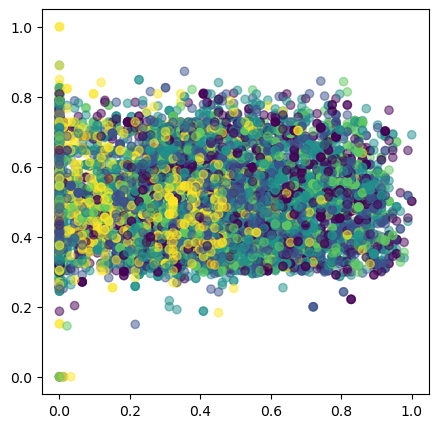

In [345]:
plt.figure(figsize=(5, 5))
plt.scatter(X_prepn[:, 0], X_prepn[:, 11], c=clusters,alpha=0.5)
plt.show()

In [346]:
kmeans.inertia_

4951.090728464278

In [348]:
%%time
kmeans = KMeans(n_clusters=5,
                init="random",
                n_init= 4,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=10,
                tol=0,
                random_state=1234)
kmeans.fit(X_prepn)
print(kmeans.inertia_)

4951.10274844272
CPU times: user 485 ms, sys: 28.4 ms, total: 513 ms
Wall time: 195 ms


/home/katherine/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/katherine/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/katherine/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/katherine/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/ka

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

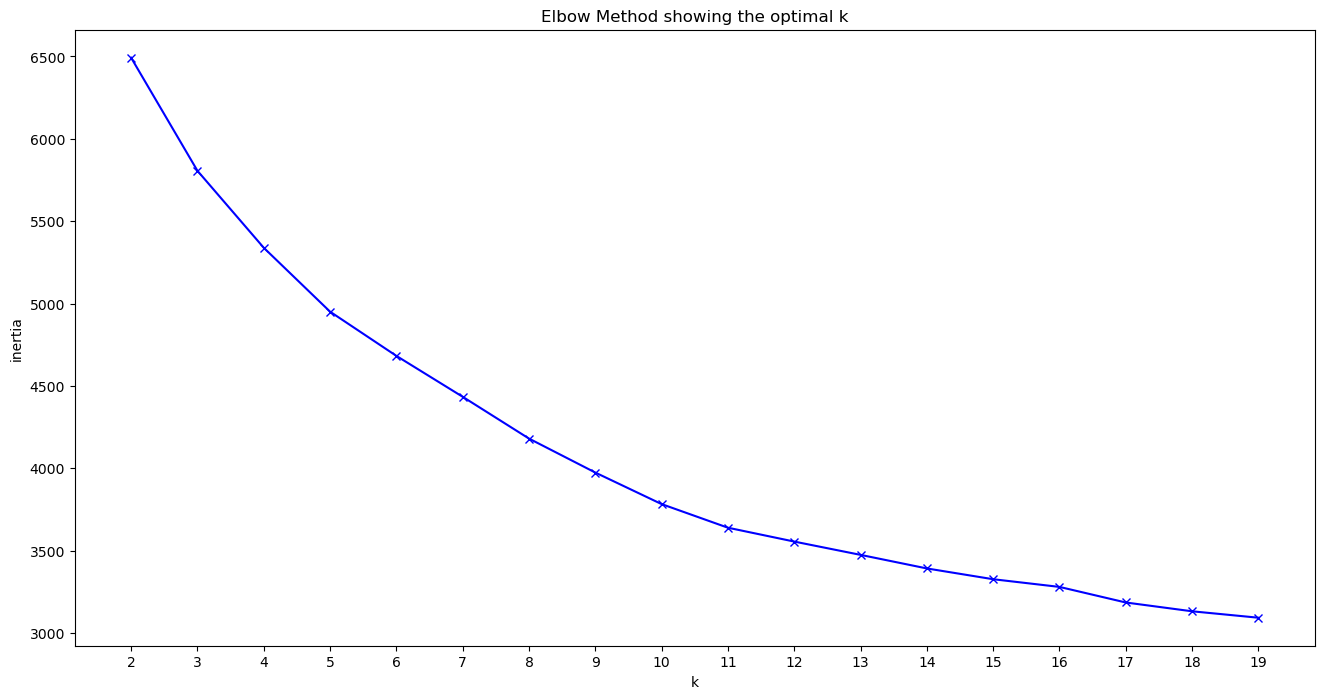

In [349]:
import numpy as np
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prepn)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

/home/katherine/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/katherine/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/katherine/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/katherine/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/ka

Text(0.5, 1.0, 'Slhouette score showing the optimal k')

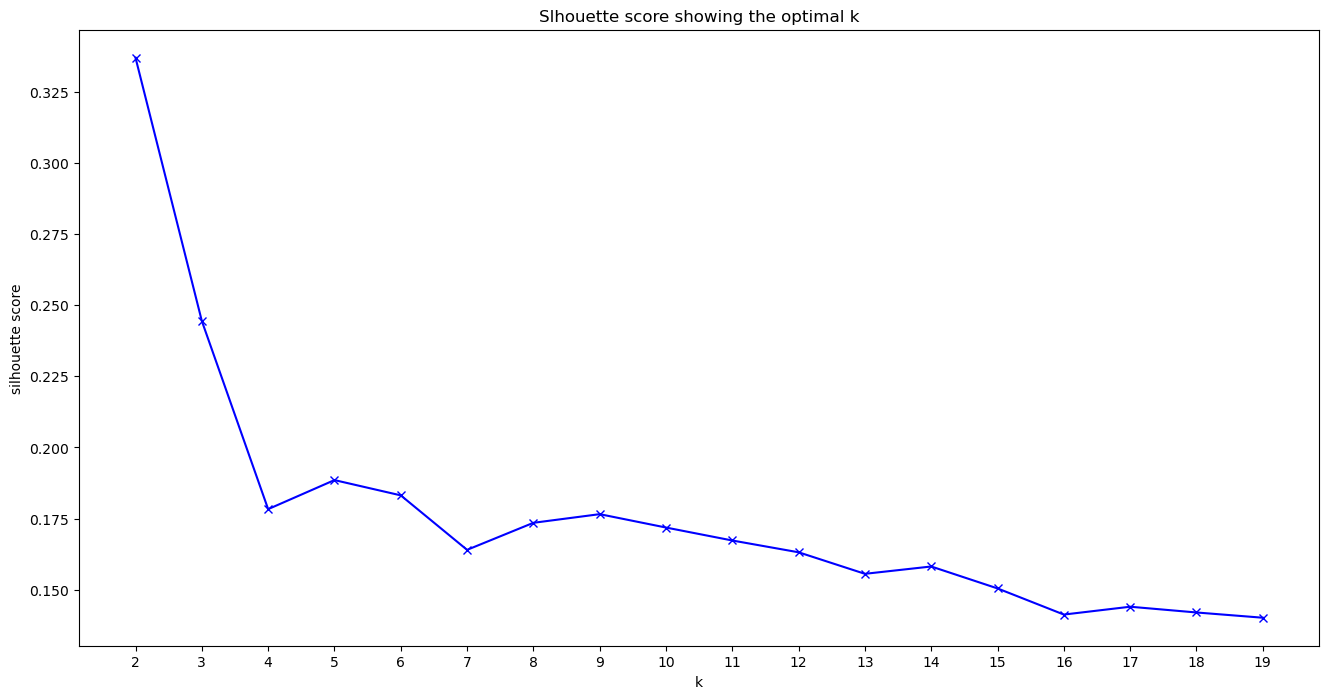

In [350]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prepn)
    silhouette.append(silhouette_score(X_prepn, kmeans.predict(X_prepn)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')